In [ ]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import contextily as cx


## Common coordinate systems

- "EPSG:4326": WGS84 Latitude/Longitude, used in GPS
- "EPSG:3395": Spherical Mercator. Google Maps, OpenStreetMap, Bing Maps
- "EPSG:32633": UTM Zones (North) – (Universal Transverse Mercator)
- "EPSG:32733": UTM Zones (South) – (Universal Transverse Mercator)

In [ ]:
df = pandas.read_excel('/Users/todd/GitHub/ecohydrology/Distribution/Info/USACE_Offices_and_locations.xlsx')
offices = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

# Set to WGS84. The coordinates in the file above were created in Google Earth.
offices = offices.set_crs('EPSG:4326')
offices

In [ ]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
# North_America = world[world.continent == 'North America']

In [ ]:
states = geopandas.read_file('/Users/todd/GitHub/ecohydrology/Distribution/Info/states_21basic/states.shp')


In [70]:
im = OffsetImage(plt.imread('/Users/todd/GitHub/ecohydrology/Distribution/Info/Corps_Castle.png', format="png"), zoom=.06)

(25.0, 50.0)

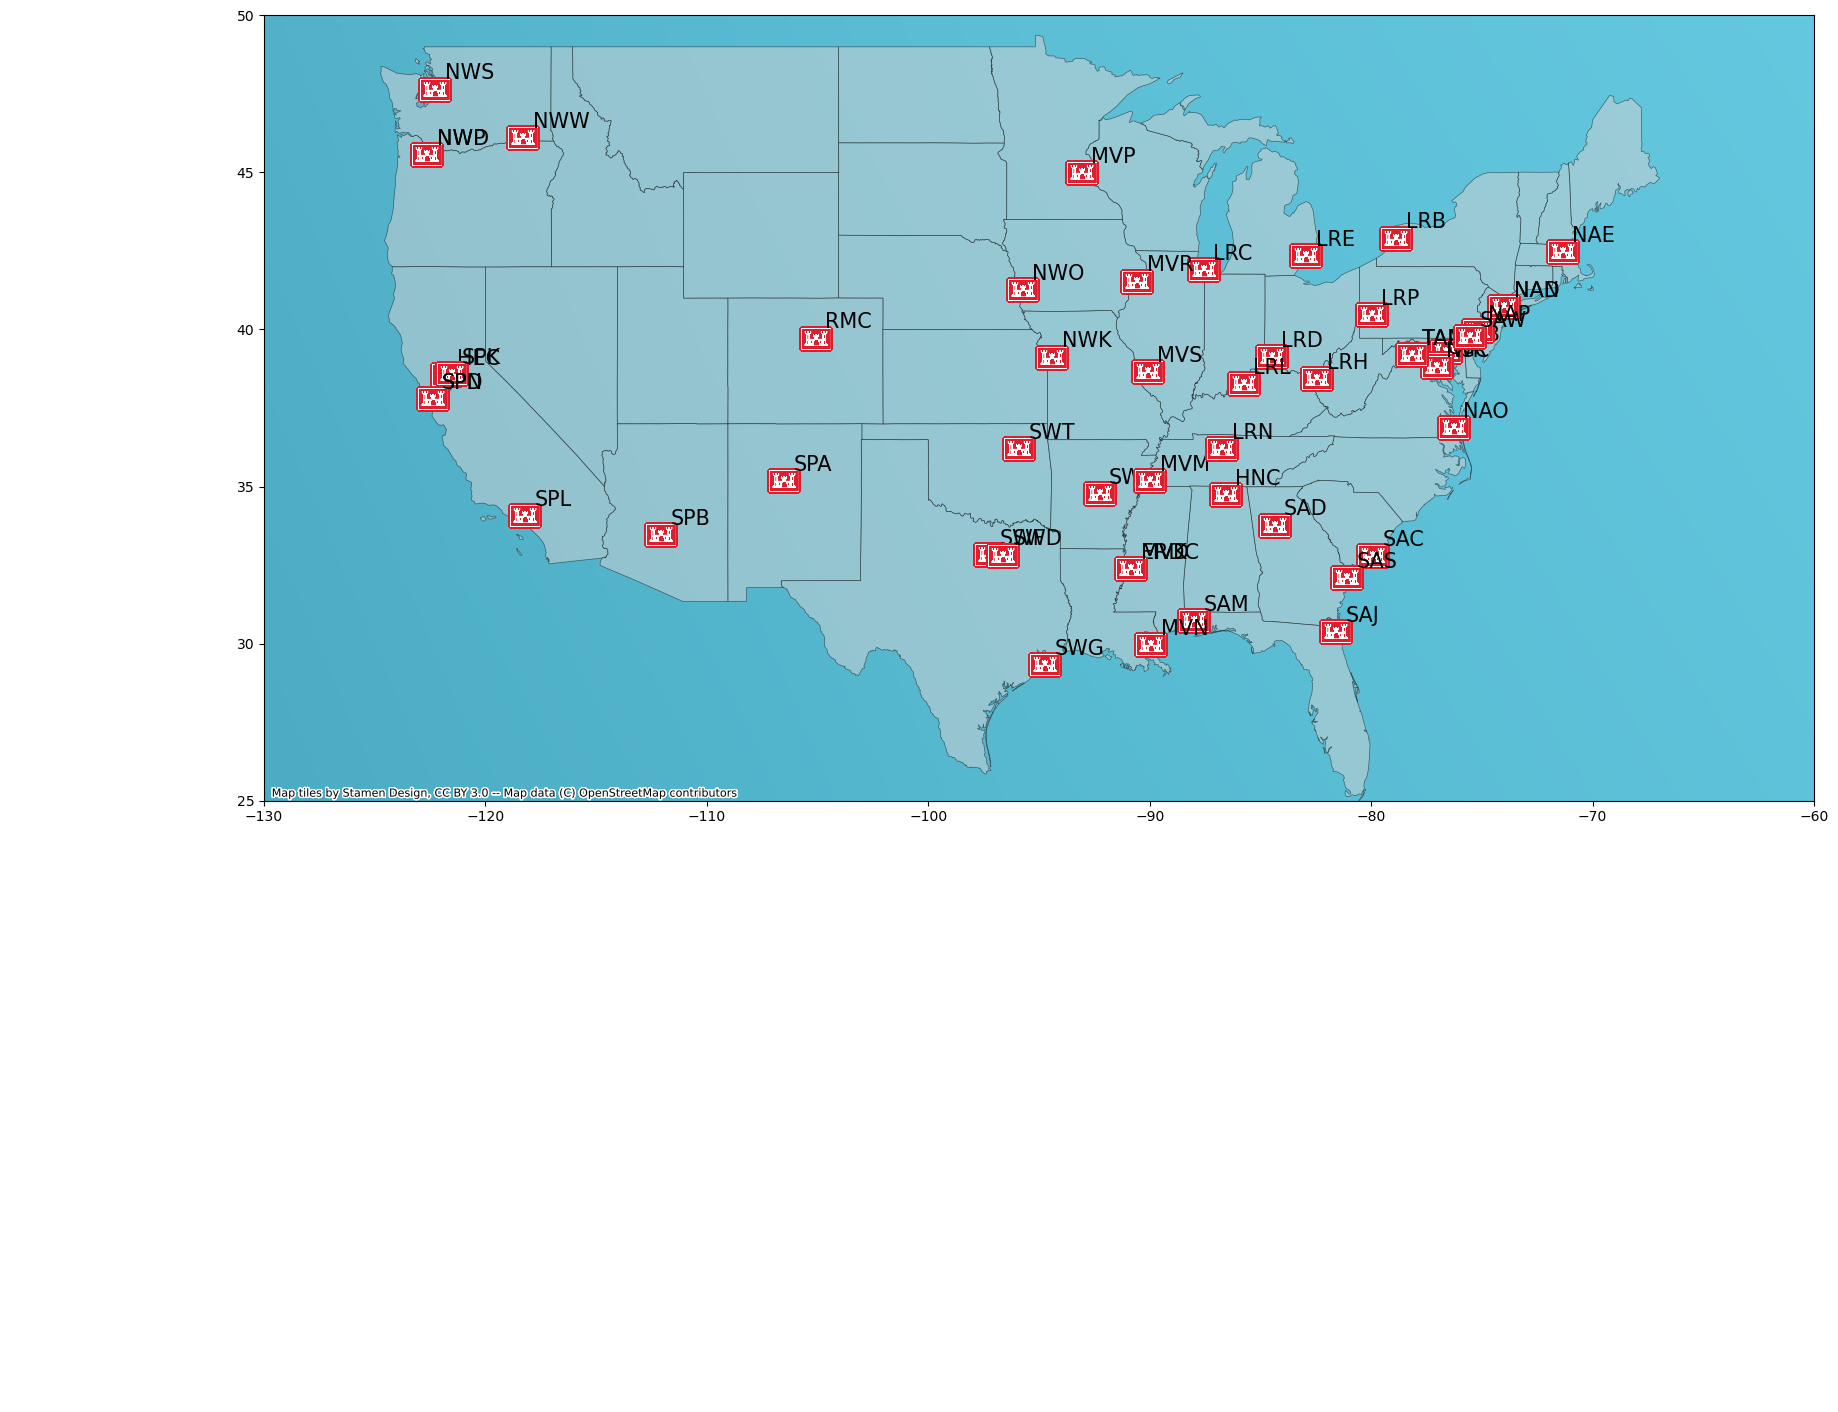

In [68]:
# locations_to_plot = ['RMC', 'SPA', 'SWT', 'NWK', 'NWO', 'SWF', 'MVP']
locations_to_plot = offices.Identifier.values

# fig, ax = plt.subplots(1, 1)
# fig.set_size_inches([20,20])
ax = offices.plot(figsize=(20,20), marker='o', color='red', markersize=20, alpha=0.5)
offices.plot(ax=ax, marker='o', color='red', markersize=20, alpha=0.5)

cx.add_basemap(ax, crs=offices.crs)
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=10)

# world.boundary.plot(ax=ax, alpha=0.5)

states.plot(ax=ax, color='lightgray', linewidth=0.5, edgecolor='black', alpha=0.5)
for x, y, label in zip(offices.geometry.x, offices.geometry.y, offices.Identifier):
    ab = AnnotationBbox(im, (x, y), frameon=False)
    ax.add_artist(ab)
    if label in locations_to_plot:
        ax.annotate(label, xy=(x+0.25, y+0.2), xytext=(3, 3), size=15, textcoords="offset points")
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
40,Texas,41,48,West South Central,TX,"MULTIPOLYGON (((-11799742.218 3661760.384, -11..."


(-1.0, 12500000.0)

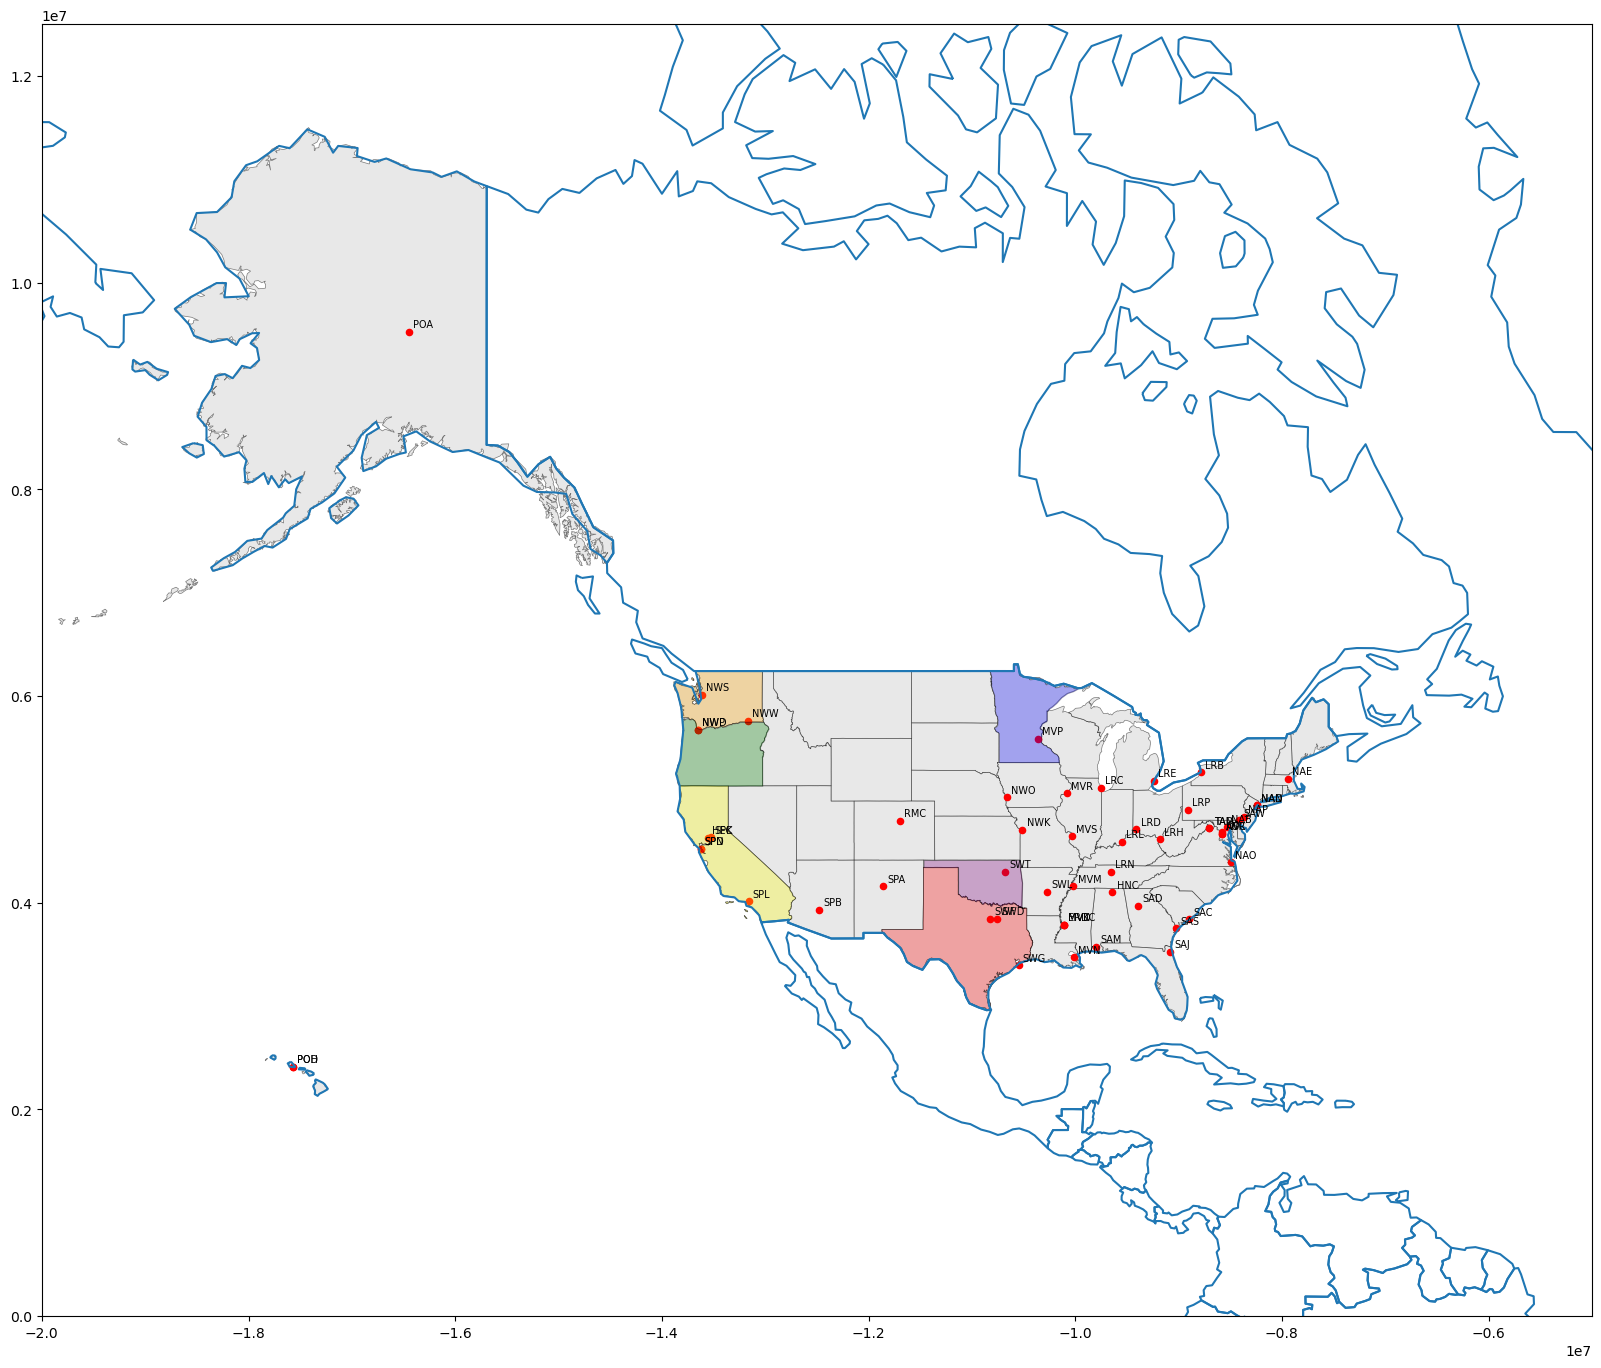

In [73]:
# Plot in Mercator projection
world_mercator = world.to_crs('epsg:3395')
offices_mercator = offices.to_crs('epsg:3395')
states_mercator = states.to_crs('epsg:3395')

Texas = states_mercator.loc[states['STATE_NAME'] == 'Texas']
Minnesota = states_mercator.loc[states['STATE_NAME'] == 'Minnesota']
Oregon = states_mercator.loc[states['STATE_NAME'] == 'Oregon']
California = states_mercator.loc[states['STATE_NAME'] == 'California']
Washington = states_mercator.loc[states['STATE_NAME'] == 'Washington']
Oklahoma = states_mercator.loc[states['STATE_NAME'] == 'Oklahoma']

display(Texas)

locations_to_plot = offices_mercator.Identifier.values
fig, ax = plt.subplots(1, 1)
fig.set_size_inches([20,20])
world_mercator.boundary.plot(ax=ax)
states_mercator.plot(ax=ax, alpha=0.5, color='lightgray', linewidth=0.5, edgecolor='black')
offices_mercator.plot(ax=ax, marker='o', color='red', markersize=20)

Texas.plot(ax=ax, alpha=0.3, color='red', linewidth=0.5, edgecolor='black')
Minnesota.plot(ax=ax, alpha=0.3, color='blue', linewidth=0.5, edgecolor='black')
Oregon.plot(ax=ax, alpha=0.3, color='green', linewidth=0.5, edgecolor='black')
California.plot(ax=ax, alpha=0.3, color='yellow', linewidth=0.5, edgecolor='black')
Washington.plot(ax=ax, alpha=0.3, color='orange', linewidth=0.5, edgecolor='black')
Oklahoma.plot(ax=ax, alpha=0.3, color='purple', linewidth=0.5, edgecolor='black')

for x, y, label in zip(offices_mercator.geometry.x, offices_mercator.geometry.y, offices_mercator.Identifier):
    if label in locations_to_plot:
        ax.annotate(label, xy=(x, y), xytext=(3, 3), size=7, textcoords="offset points")
ax.set_xlim([-2e7,-0.5e7])
ax.set_ylim([-1,1.25e7])

In [ ]:
# world.plot(column='pop_est', ax=ax, legend=True)
offices.to_excel('USACE_Offices_and_locations_output.xlsx')

In [ ]:
offices_mercator.to_excel('USACE_Offices_and_locations_Mercator.xlsx')